<a href="https://colab.research.google.com/github/Josemora76/Challenge-Amigo-secreto/blob/main/challenge_alurastorelatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda  = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Facturación por tienda
facturacion_tienda1 = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Crear un diccionario con los totales
facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}

# Buscar la tienda con mayor facturación
tienda_mayor = max(facturaciones, key=facturaciones.get)
mayor_valor = facturaciones[tienda_mayor]

# Mostrar resultados en formato tabular
print("\n📊 Facturación por Tienda")
print("="*50)
print(f"{'Tienda':<10} | {'Facturación':>15} | {'Notas'}")
print("-"*50)
for tienda, valor in facturaciones.items():
    marca = "⭐ Más ventas" if tienda == tienda_mayor else ""
    print(f"{tienda:<10} | ${valor:>14,.2f} | {marca}")
print("="*50)
print(f"\n🏆 La tienda que más facturó fue: {tienda_mayor} con ${mayor_valor:,.2f}\n")





📊 Facturación por Tienda
Tienda     |     Facturación | Notas
--------------------------------------------------
Tienda 1   | $1,150,880,400.00 | ⭐ Más ventas
Tienda 2   | $1,116,343,500.00 | 
Tienda 3   | $1,098,019,600.00 | 
Tienda 4   | $1,038,375,700.00 | 

🏆 La tienda que más facturó fue: Tienda 1 con $1,150,880,400.00



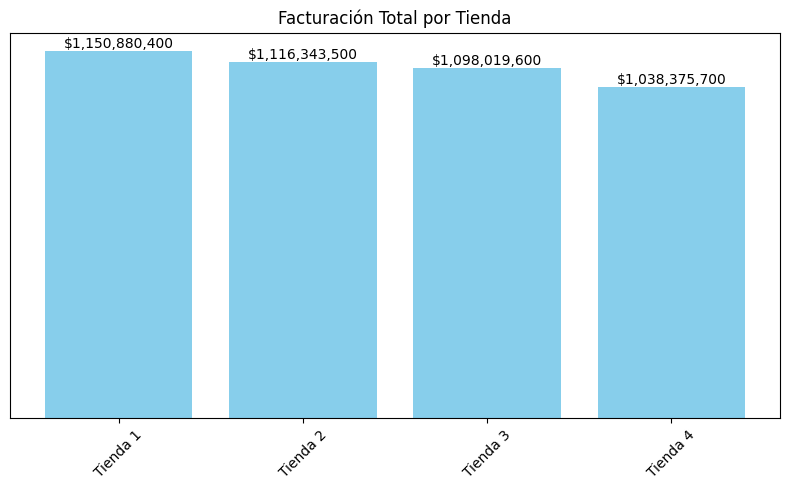

In [ ]:
# Nombres de las tiendas (eje x)
tiendas = list(facturaciones.keys())

# Valores de facturación (eje y)
valores_facturacion = list(facturaciones.values())

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores_facturacion, color='skyblue')

# Añadir título
plt.title('Facturación Total por Tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for i, valor in enumerate(valores_facturacion):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')

plt.yticks([])  # Esto elimina los números del eje Y

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Segun los datos analizados, ta lienda que mas vendio fue la tienda numero 1.
##El por que no lo podemos responder solamente con estos datos. Esperemos tener la respuesta con los analisis que realizaremos mas adelante.

# 2. Ventas por categoría

In [ ]:
import pandas as pd

# Crear diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# DataFrame para acumular facturación por categoría en todas las tiendas
facturacion_total = pd.Series(dtype=float)

# Crear un DataFrame con la facturación por categoría para cada tienda
facturacion_por_categoria = pd.DataFrame()

# Imprimir facturación por categoría en cada tienda con formato
for nombre, df in tiendas.items():
    facturacion_categoria = df.groupby('Categoría del Producto')['Precio'].sum()

    # Add the facturation for the current store as a new column
    facturacion_por_categoria[nombre] = facturacion_categoria

    # Identificar la categoría con más ventas en esa tienda
    categoria_top = facturacion_categoria.idxmax()
    valor_top = facturacion_categoria.max()

    print(f"\n📊 Facturación por categoría en {nombre}:")
    print("="*65)
    print(f"{'Categoría':<30} | {'Facturación':>15} | {'Notas'}")
    print("-"*65)

    for categoria, valor in facturacion_categoria.sort_values(ascending=False).items():
        marca = "⭐ Más ventas" if categoria == categoria_top else ""
        print(f"{categoria:<30} | ${valor:>14,.2f} | {marca}")

    print("="*65)
    print(f"🏆 Categoría más vendida en {nombre}: {categoria_top} (${valor_top:,.2f})")

    # Acumular facturación total por categoría
    facturacion_total = facturacion_total.add(facturacion_categoria, fill_value=0)

# Calcular la categoría más vendida en general
categoria_global_top = facturacion_total.idxmax()
valor_global_top = facturacion_total.max()

print("\n\n📈 Facturación total (todas las tiendas combinadas):")
print("="*65)
print(f"{'Categoría':<30} | {'Facturación':>15}")
print("-"*65)
for categoria, valor in facturacion_total.sort_values(ascending=False).items():
    marca = "⭐ Más ventas" if categoria == categoria_global_top else ""
    print(f"{categoria:<30} | ${valor:>14,.2f} {marca}")
print("="*65)

print(f"\n🏆 La categoría más vendida en general fue: {categoria_global_top} con ${valor_global_top:,.2f}")


📊 Facturación por categoría en Tienda 1:
Categoría                      |     Facturación | Notas
-----------------------------------------------------------------
Electrónicos                   | $429,493,500.00 | ⭐ Más ventas
Electrodomésticos              | $363,685,200.00 | 
Muebles                        | $187,633,700.00 | 
Instrumentos musicales         | $ 91,299,000.00 | 
Deportes y diversión           | $ 39,290,000.00 | 
Juguetes                       | $ 17,995,700.00 | 
Artículos para el hogar        | $ 12,698,400.00 | 
Libros                         | $  8,784,900.00 | 
🏆 Categoría más vendida en Tienda 1: Electrónicos ($429,493,500.00)

📊 Facturación por categoría en Tienda 2:
Categoría                      |     Facturación | Notas
-----------------------------------------------------------------
Electrónicos                   | $410,831,100.00 | ⭐ Más ventas
Electrodomésticos              | $348,567,800.00 | 
Muebles                        | $176,426,300.00 | 
Instru

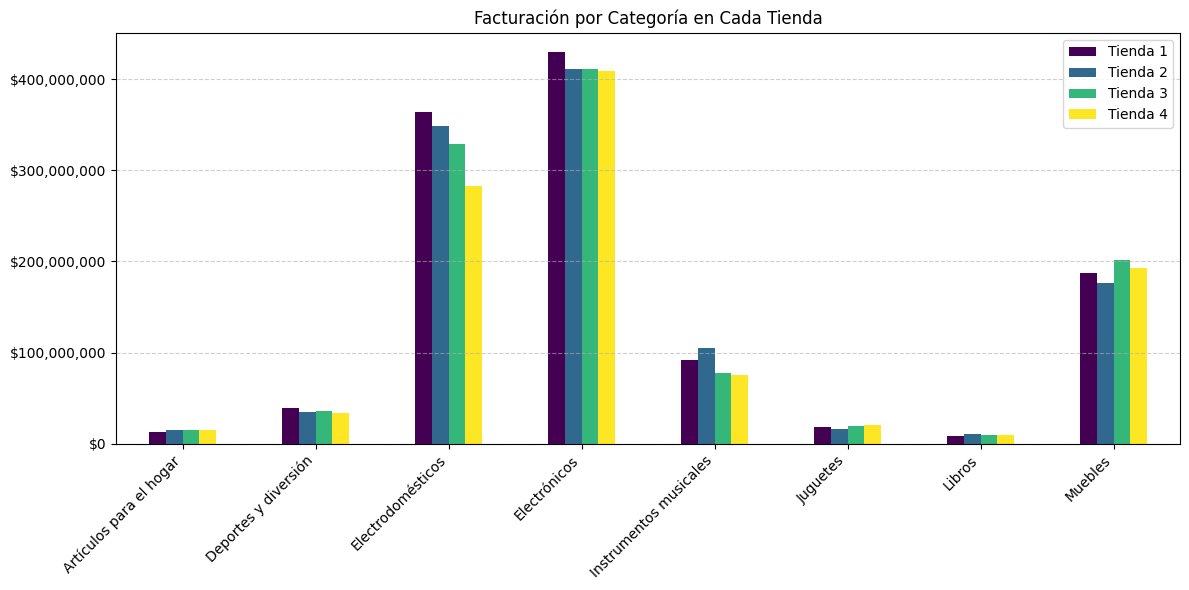

In [ ]:
#Crear gráfico de barras agrupadas
ax = facturacion_por_categoria.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Añadir título y etiquetas
plt.title('Facturación por Categoría en Cada Tienda')
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right') # Rotate and align labels
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Formatear los valores en el eje Y con comas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## En el calculo de ventas por categorias  podemos observar que la categoria que mas se vende en todas la tiendas es la categoria Electronicos.


# 3. Calificación promedio de la tienda


In [ ]:
tiendas = {'Tienda 1': tienda,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

calificaciones_promedio = {}

for nombre, df in tiendas.items():
    promedio_calificacion = df['Calificación'].mean()
    calificaciones_promedio[nombre] = promedio_calificacion
    # Mostrar calificación promedio por tienda
    print(f"Calificación promedio en {nombre}: {promedio_calificacion:.4f}")

Calificación promedio en Tienda 1: 3.9767
Calificación promedio en Tienda 2: 4.0373
Calificación promedio en Tienda 3: 4.0483
Calificación promedio en Tienda 4: 3.9958


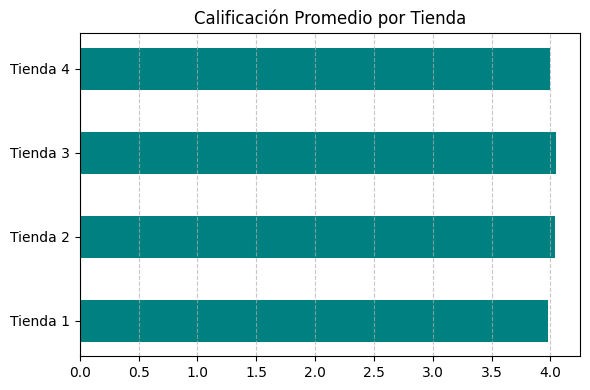

In [ ]:

# Crear gráfico de barras horizontales para mostrar la calificación promedio por tienda
plt.figure(figsize=(6, 4))
plt.barh(list(calificaciones_promedio.keys()), list(calificaciones_promedio.values()), color='teal', height=0.5)

# Añadir título
plt.title('Calificación Promedio por Tienda')

# Quitar las etiquetas de los ejes
plt.xlabel('')
plt.ylabel('')

# Añadir la grilla
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##La tienda mejor calificada es la tienda 3, con una puntuación de 4.0483

# 4. Productos más y menos vendidos

In [ ]:
# Crear diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Mostrar ventas por categoría, categoría más y menos vendida en cada tienda
for nombre, df in tiendas.items():
    ventas_categoria = df['Categoría del Producto'].value_counts()
    total_ventas = ventas_categoria.sum()  # Total de productos vendidos

    print(f"\nVentas por categoría en {nombre}:\n{ventas_categoria}")

    categoria_mas_vendida = ventas_categoria.idxmax()
    ventas_max = ventas_categoria.max()

    categoria_menos_vendida = ventas_categoria.idxmin()
    ventas_min = ventas_categoria.min()

    print(f"Categoría más vendida: {categoria_mas_vendida} ({ventas_max} ventas)")
    print(f"Categoría menos vendida: {categoria_menos_vendida} ({ventas_min} ventas)")
    print(f"Total de productos vendidos: {total_ventas} productos")

# Crear tabla resumen con ventas por categoría en cada tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': tienda['Categoría del Producto'].value_counts(),
    'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
    'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
    'Tienda 4': tienda4['Categoría del Producto'].value_counts()
}).fillna(0)


Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Categoría más vendida: Muebles (465 ventas)
Categoría menos vendida: Artículos para el hogar (171 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Categoría más vendida: Muebles (442 ventas)
Categoría menos vendida: Artículos para el hogar (181 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda 3:
C

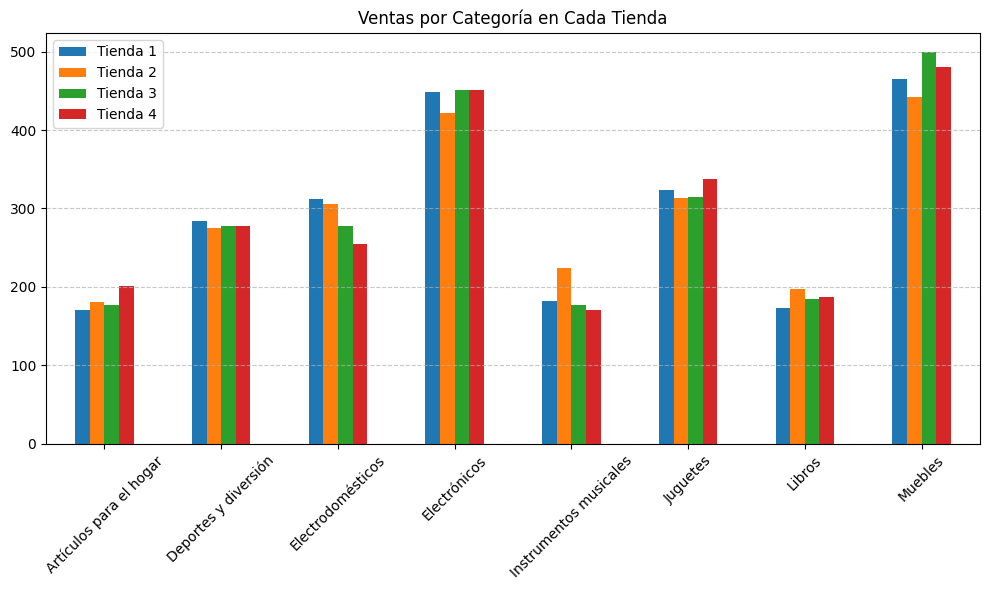

In [ ]:
# Crear gráfico de barras agrupadas
ax = ventas_por_categoria.plot(kind='bar', figsize=(10, 6))  # Guarda en 'ax'
plt.title('Ventas por Categoría en Cada Tienda')
ax.set_xlabel('')  # Esto ahora sí funciona porque 'ax' está definido correctamente
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## La categoria mas vendida es la de muebles, esta es la categoria mas vendida en cada una de las tiendas.


# 5. Envío promedio por tienda

In [ ]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

costo_envio_promedio = {}

for nombre, df in tiendas.items():
    promedio = df['Costo de envío'].mean()
    costo_envio_promedio[nombre] = promedio
    # Mostrar costo de envío promedio de la tienda
    print(f"Costo de envío promedio en {nombre}: ${promedio:,.2f}")


Costo de envío promedio en Tienda 1: $26,018.61
Costo de envío promedio en Tienda 2: $25,216.24
Costo de envío promedio en Tienda 3: $24,805.68
Costo de envío promedio en Tienda 4: $23,459.46


## El costo del envio promedio por tienda es el siguiente:
## Tienda 1 = 26.018,61
## Tienda 2 = 25.216,24
## Tienda 3 = 24.805,68
## Tienda 4 = 23.459,46